In [1]:
import sys,os,re
import urllib.request
import pandas
import numpy
import sklearn
import sklearn.model_selection
import sklearn.metrics
import sklearn.naive_bayes
import sklearn.neural_network
import matplotlib.pyplot

In [2]:
def print_score(Ytrue,Ypred):
  print("precision: %.2f ; recall: %.2f ; F1: %.2f"%(
        sklearn.metrics.precision_score(Ytrue,Ypred),
        sklearn.metrics.recall_score(Ytrue,Ypred),
        sklearn.metrics.f1_score(Ytrue,Ypred)), file=sys.stderr)

### *UC Irvine ML Archive dataset: Pima Indians & Diabetes*

In [3]:
#fin = urllib.request.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data") #problem with url
fin = open('pima-indians-diabetes.data','r')

pima_df = pandas.read_csv(fin, header=None,
        names = [
        "number_of_times_pregnant",
        "plasma_glucose_concentration",
        "diastolic_blood_pressure",
        "triceps_skin_fold_thickness",
        "serum_insulin",
        "body_mass_index",
        "diabetes_pedigree",
        "age",
        "class"])

fin.close()  
nrows,ncols = pima_df.shape
print("dataset ncols: %d ; nrows: %d:"%(ncols,nrows))
print(pima_df.head())

dataset ncols: 9 ; nrows: 768:
   number_of_times_pregnant  plasma_glucose_concentration  \
0                         6                           148   
1                         1                            85   
2                         8                           183   
3                         1                            89   
4                         0                           137   

   diastolic_blood_pressure  triceps_skin_fold_thickness  serum_insulin  \
0                        72                           35              0   
1                        66                           29              0   
2                        64                            0              0   
3                        66                           23             94   
4                        40                           35            168   

   body_mass_index  diabetes_pedigree  age  class  
0             33.6              0.627   50      1  
1             26.6              0.351   31     

In [4]:
print(pima_df.tail())

     number_of_times_pregnant  plasma_glucose_concentration  \
763                        10                           101   
764                         2                           122   
765                         5                           121   
766                         1                           126   
767                         1                            93   

     diastolic_blood_pressure  triceps_skin_fold_thickness  serum_insulin  \
763                        76                           48            180   
764                        70                           27              0   
765                        72                           23            112   
766                        60                            0              0   
767                        70                           31              0   

     body_mass_index  diabetes_pedigree  age  class  
763             32.9              0.171   63      0  
764             36.8              0.340   27      

### Histograms

In [5]:
pima_df.columns

Index(['number_of_times_pregnant', 'plasma_glucose_concentration',
       'diastolic_blood_pressure', 'triceps_skin_fold_thickness',
       'serum_insulin', 'body_mass_index', 'diabetes_pedigree', 'age',
       'class'],
      dtype='object')

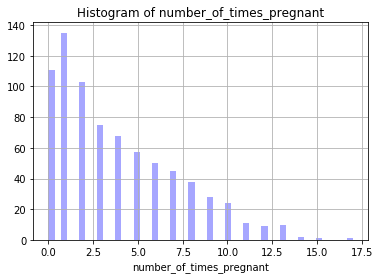

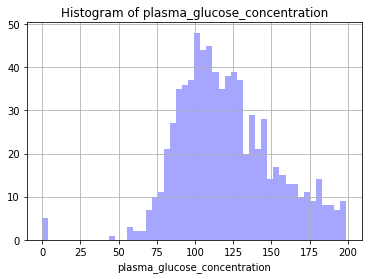

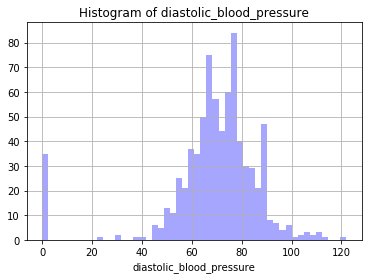

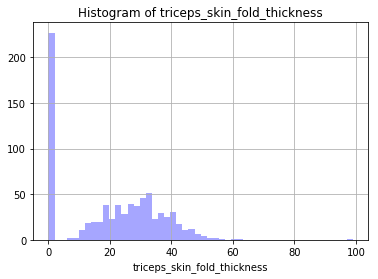

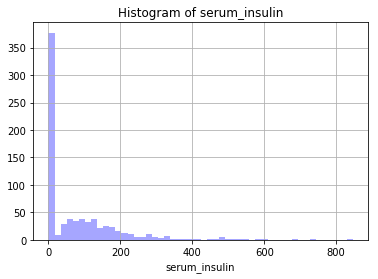

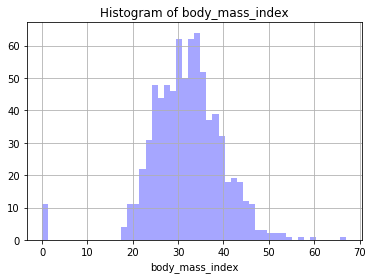

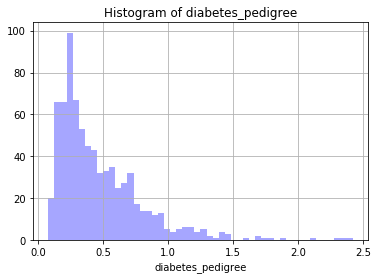

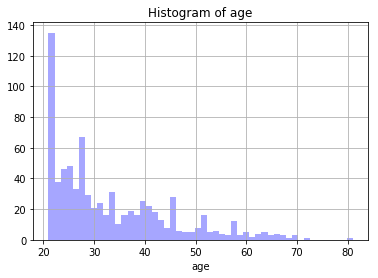

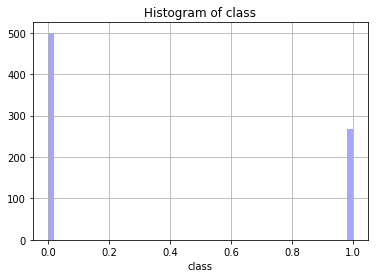

In [6]:
for col in pima_df.columns:   
    n, bins, patches = matplotlib.pyplot.hist(pima_df[col], 50, facecolor='#8888FF', alpha=0.75)

    matplotlib.pyplot.xlabel(col)
    matplotlib.pyplot.title('Histogram of '+col)
    matplotlib.pyplot.grid(True)
    matplotlib.pyplot.show()

### Read metadata


In [7]:
#fin = urllib.request.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names") #problem with url
fin = open('pima-indians-diabetes.names','r') 
#pima_metadata = fin.read().decode('utf8')
pima_metadata = fin.read()
fin.close() 
pima_metadata.splitlines()

['1. Title: Pima Indians Diabetes Database',
 '',
 '2. Sources:',
 '   (a) Original owners: National Institute of Diabetes and Digestive and',
 '                        Kidney Diseases',
 '   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)',
 '                          Research Center, RMI Group Leader',
 '                          Applied Physics Laboratory',
 '                          The Johns Hopkins University',
 '                          Johns Hopkins Road',
 '                          Laurel, MD 20707',
 '                          (301) 953-6231',
 '   (c) Date received: 9 May 1990',
 '',
 '3. Past Usage:',
 '    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \\&',
 '       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast',
 '       the onset of diabetes mellitus.  In {\\it Proceedings of the Symposium',
 '       on Computer Applications and Medical Care} (pp. 261--265).  IEEE',
 '       Computer Society Press.',
 '',
 

### Separate input variables and class labels into X & Y arrays.

In [8]:
Y = pima_df['class'].as_matrix() 
X = pima_df.iloc[:,0:ncols-1].as_matrix()

### Create train/test split for modeling

In [10]:
Xtrain,Xtest,Ytrain,Ytest = sklearn.model_selection.train_test_split(X, Y, test_size=0.2)
print("training set: %s ; test set: %s"%(Xtrain.shape, Xtest.shape))

training set: (614, 8) ; test set: (154, 8)


### Naive Bayes

In [11]:
nb = sklearn.naive_bayes.GaussianNB() 
nb.fit(Xtrain,Ytrain)
Y_pred = nb.predict(Xtest)
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(Ytest, Y_pred).ravel()
print("TP: %d ; TN: %d ; FP: %d ; FN: %d"%(tp, tn, fp, fn))
print_score(Ytest,Y_pred)

TP: 34 ; TN: 86 ; FP: 11 ; FN: 23


precision: 0.76 ; recall: 0.60 ; F1: 0.67


In [12]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

### Neural Network

In [15]:
nn = sklearn.neural_network.MLPClassifier() 
nn.fit(Xtrain,Ytrain)
y_pred = nn.predict(Xtest)
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(Ytest, y_pred).ravel()
print("TP: %d ; TN: %d ; FP: %d ; FN: %d"%(tp, tn, fp, fn))
print_score(Ytest,Y_pred)

TP: 31 ; TN: 67 ; FP: 30 ; FN: 26


precision: 0.76 ; recall: 0.60 ; F1: 0.67


In [16]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

## Occam's razor?